In [44]:
import pickle
import gzip
import numpy as np
import tensorflow as tf

def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')  # unzip and open
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1") 
    # training_data : a tuple with 2 entries 1. (28*28 * 50,000) / 2. right difits between (0,9) for the corresponding images
    # validation_data : similar but contains only 10,000 images 
    # test_data : similar but contains only 10,000 images
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    tr_d, va_d, te_d = load_data()

    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    # e.g.) (0,0,0,0,0,1,0,0,0,0) --> 5
    # e.g.) (0,0,0,0,0,0,0,0,0,1) --> 9
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [45]:
training, validation, test = load_data()
training2, validation2, test2 = load_data_wrapper()

# New Section

# New Section

In [4]:
print(training[0].shape)
print(type(training[0]))
print(training[1].shape)
print(type(training[1]))
print()

(50000, 784)
<class 'numpy.ndarray'>
(50000,)
<class 'numpy.ndarray'>



In [50]:
training_data = list(training2)
test_data = list(test2)

In [69]:
from tensorflow import keras
from tensorflow.keras import layers, models
model = models.Sequential()

model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(25, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

In [70]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training[0], training[1], validation_data=(test[0], test[1]), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9941 - accuracy: 0.7669 - val_loss: 0.4140 - val_accuracy: 0.8965
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3325 - accuracy: 0.9114 - val_loss: 0.2644 - val_accuracy: 0.9263
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2390 - accuracy: 0.9320 - val_loss: 0.2143 - val_accuracy: 0.9377
Epoch 4/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1972 - accuracy: 0.9432 - val_loss: 0.1865 - val_accuracy: 0.9437
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1705 - accuracy: 0.9511 - val_loss: 0.1735 - val_accuracy: 0.9456
Epoch 6/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1522 - accuracy: 0.9555 - val_loss: 0.1616 - val_accuracy: 0.9498
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1390 - accuracy: 0.9597 - val_loss: 0.1558 - val_accuracy:

In [71]:
test_loss, test_acc = model.evaluate(test[0], test[1])
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1389 - accuracy: 0.9576
0.1388643980026245
0.9575999975204468


[0.7668600082397461, 0.9114000201225281, 0.9319800138473511, 0.9431999921798706, 0.9510599970817566, 0.9554600119590759, 0.959659993648529, 0.9632599949836731, 0.964460015296936, 0.9671800136566162, 0.9695799946784973, 0.9712200164794922, 0.972599983215332, 0.9735199809074402, 0.9751200079917908]
[0.8964999914169312, 0.9262999892234802, 0.9376999735832214, 0.9437000155448914, 0.9455999732017517, 0.9498000144958496, 0.9521999955177307, 0.9527999758720398, 0.9537000060081482, 0.9564999938011169, 0.955299973487854, 0.9573000073432922, 0.9564999938011169, 0.958299994468689, 0.9575999975204468]
[0.9940947890281677, 0.3324817717075348, 0.2389904111623764, 0.19716763496398926, 0.1704731583595276, 0.15224245190620422, 0.13897423446178436, 0.1279786378145218, 0.11898114532232285, 0.11140402406454086, 0.10460131615400314, 0.09888838231563568, 0.09380200505256653, 0.08877859264612198, 0.08425220847129822]
[0.41397225856781006, 0.26438337564468384, 0.21428683400154114, 0.18648463487625122, 0.17345

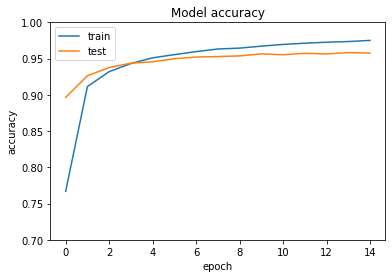

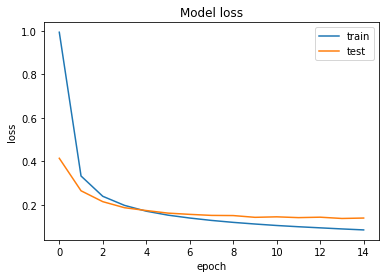

In [73]:
import matplotlib.pyplot as plt

print(history.history['accuracy'])
print(history.history['val_accuracy'])

print(history.history['loss'])
print(history.history['val_loss'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.ylim(0.7,1.0)
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()